In [1]:
import json
import matplotlib.pyplot as plt

In [ ]:
TASK = "2.time_presidents"

with open(f"./logprob/outputs/Llama-2-7b-chat-hf/none/Temporal/{TASK}.json") as fp:
    none = json.load(fp)
with open(f"./logprob/outputs/Llama-2-7b-chat-hf/a18h3/Temporal/{TASK}.json") as fp:
    a18h3 = json.load(fp)
with open(f"./logprob/outputs/Llama-2-7b-chat-hf/a15h0/Temporal/{TASK}.json") as fp:
    a15h0 = json.load(fp)
with open(f"./logprob/outputs/Llama-2-7b-chat-hf/a18h3,a15h0/Temporal/{TASK}.json") as fp:
    a18h3_a15h0 = json.load(fp)

In [3]:
subjects = sorted({x["subject"] for x in none["samples"]})
subjects

['Argentina', 'Pakistan', 'Russia', 'South Korea', 'United States']

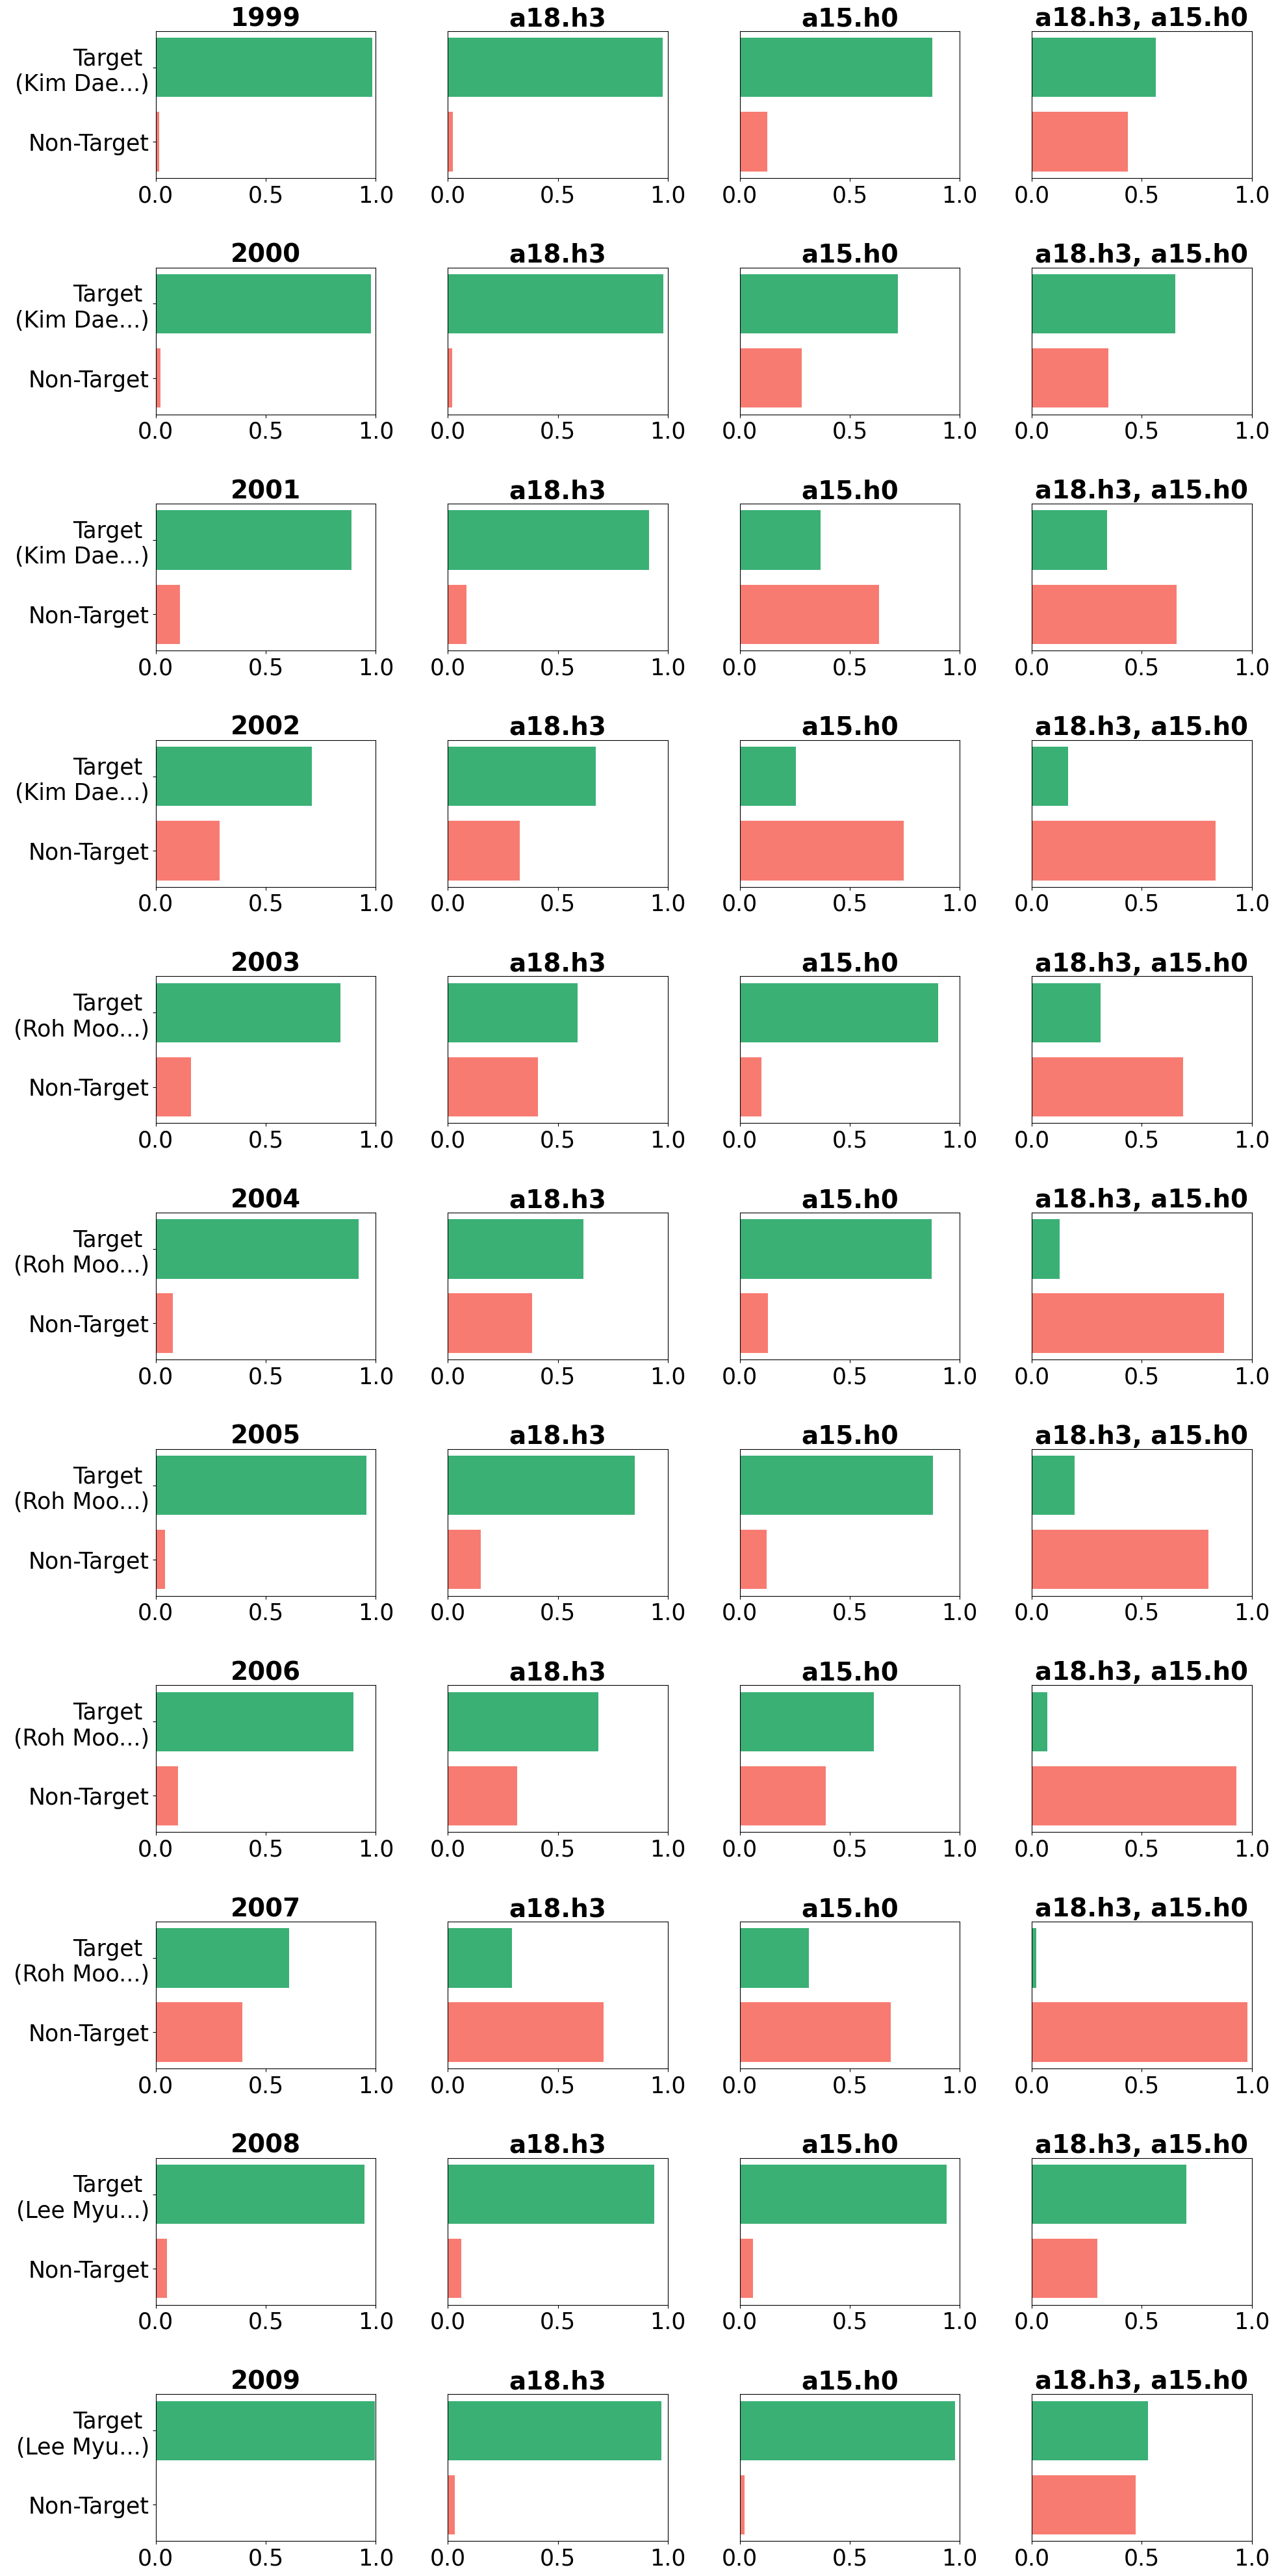

In [ ]:
def draw(TARGET_SUBJECT, TARGET_TEMPLATE, selected_years, ylabel_fontsize=25, xlabel_fontsize=25):
    # plt.figure(figsize=(20, 17))
    plt.figure(figsize=(20, 40))

    title = ("none", "a18.h3", "a15.h0", "a18.h3, a15.h0")

    filtered_data = [
        x for x in none["predictions"][TARGET_TEMPLATE]
        if x["subject"] == TARGET_SUBJECT and x["time"] in selected_years
    ]
    
    length = len(filtered_data)
    if length == 0:
        print(f"No data found for {TARGET_SUBJECT} in selected years {selected_years}.")
        return
    
    for j, x in enumerate(filtered_data):
        for i, pred in enumerate((none, a18h3, a15h0, a18h3_a15h0)):
            filtered_pred = [
                y for y in pred["predictions"][TARGET_TEMPLATE]
                if y["subject"] == TARGET_SUBJECT and y["time"] == x["time"]
            ]
            
            for k, y in enumerate(filtered_pred):
                plt.subplot(length, 4, i + j * 4 + 1)
                bars = plt.barh(
                    ["Non-Target", f"Target \n ({y['object'][:7]}...)"],
                    [1 - y["probs"][y["object"]], y["probs"][y["object"]]],
                    color=["#F77B71", "#3AB075"], 
                )
                plt.xlim(0, 1)
                
                if i > 0:
                    plt.yticks([]) 
                else:
                    plt.yticks(fontsize=ylabel_fontsize)
                
                plt.xticks([0.0, 0.5, 1.0], fontsize=xlabel_fontsize)
                
                plt.title(title[i] if i > 0 else f'{y["time"]}', fontsize=28, fontweight="bold")
    
    plt.tight_layout(pad=2, w_pad=4, h_pad=4)
    plt.show()

draw(
    TARGET_SUBJECT=subjects[3],
    TARGET_TEMPLATE="prompt_templates:0",
    # selected_years=["1999", "2002", "2004", "2009"]
    selected_years=["1999", '2000', '2001', "2002", '2003', "2004", '2005', '2006', '2007', '2008', "2009"]
)